# Gender recognition by Voice

# Importing libraries

In [196]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.float_format',lambda x: '%5f' % x)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Problem Statement

Given Acoustuical analysis of Human voices for Males & Females, we need to develop a model which Classifies voice in future as Male or Female.

# Data Description

This database was created to identify a Human voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.


The following acoustic properties of each voice are measured and included within the CSV:
 - meanfreqmean: frequency (in kHz)
 - sd : standard deviation of frequency
 - median : median frequency (in kHz)
 - Q25 : first quantile (in kHz)
 - Q75 : third quantile (in kHz)
 - IQR : interquantile range (in kHz)
 - skew : skewness (see note in specprop description)
 - kurt : kurtosis (see note in specprop description)
 - sp.ent : spectral entropy
 - sfm : spectral flatness
 - mode : mode frequency
 - centroid : frequency centroid (see specprop)
 - meanfun : average of fundamental frequency measured across acoustic signal
 - minfun : minimum fundamental frequency measured across acoustic signal
 - maxfun : maximum fundamental frequency measured across acoustic signal
 - meandom : average of dominant frequency measured across acoustic signal
 - mindom : minimum of dominant frequency measured across acoustic signal
 - maxdom : maximum of dominant frequency measured across acoustic signal
 - dfrange : range of dominant frequency measured across acoustic signal
 - modindx : modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
 - label : male or female


# Importing The Dataset

In [197]:
voice_df=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')

In [198]:
voice_df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


# EDA

In [199]:
voice_df.shape

(3168, 21)

In [200]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

- Dataset has 3168 rows and 21 Columns.
- All columns has 3168 non-null count. (Looks no Missing value)
- Label is the only object Column and our Target variable.

**Checking for missing values**

In [201]:
voice_df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

- Hence confirming no missing values.

In [202]:
voice_df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


- some of the columns are highly skewed and more likely to have outliers.

In [203]:
#profile_pl = voice_df.profile_report(title="Voice recognition profiling", progress_bar=False, minimal=True) 
#profile_pl.to_file(output_file="gender recognition profiling.html")

Observations from Profilling:-
    
- Columns Sd, Q25,Sp.ent, Sfm, Meanfun are almost normally distributed.
- Columns Meanfreq, Q75, Mode, Centroid, Meandown, Maxdom, dfrange are moderately skewwed, some positively &  some negatively.
- Columns Skew, Kurt, Minfun, Maxfun, Mindom, Modindx are highly skewwed, some positively &  some negatively.
- Columns Skew, Kurt, Minfun, Modindx, Maxfun have high chances of outliers.

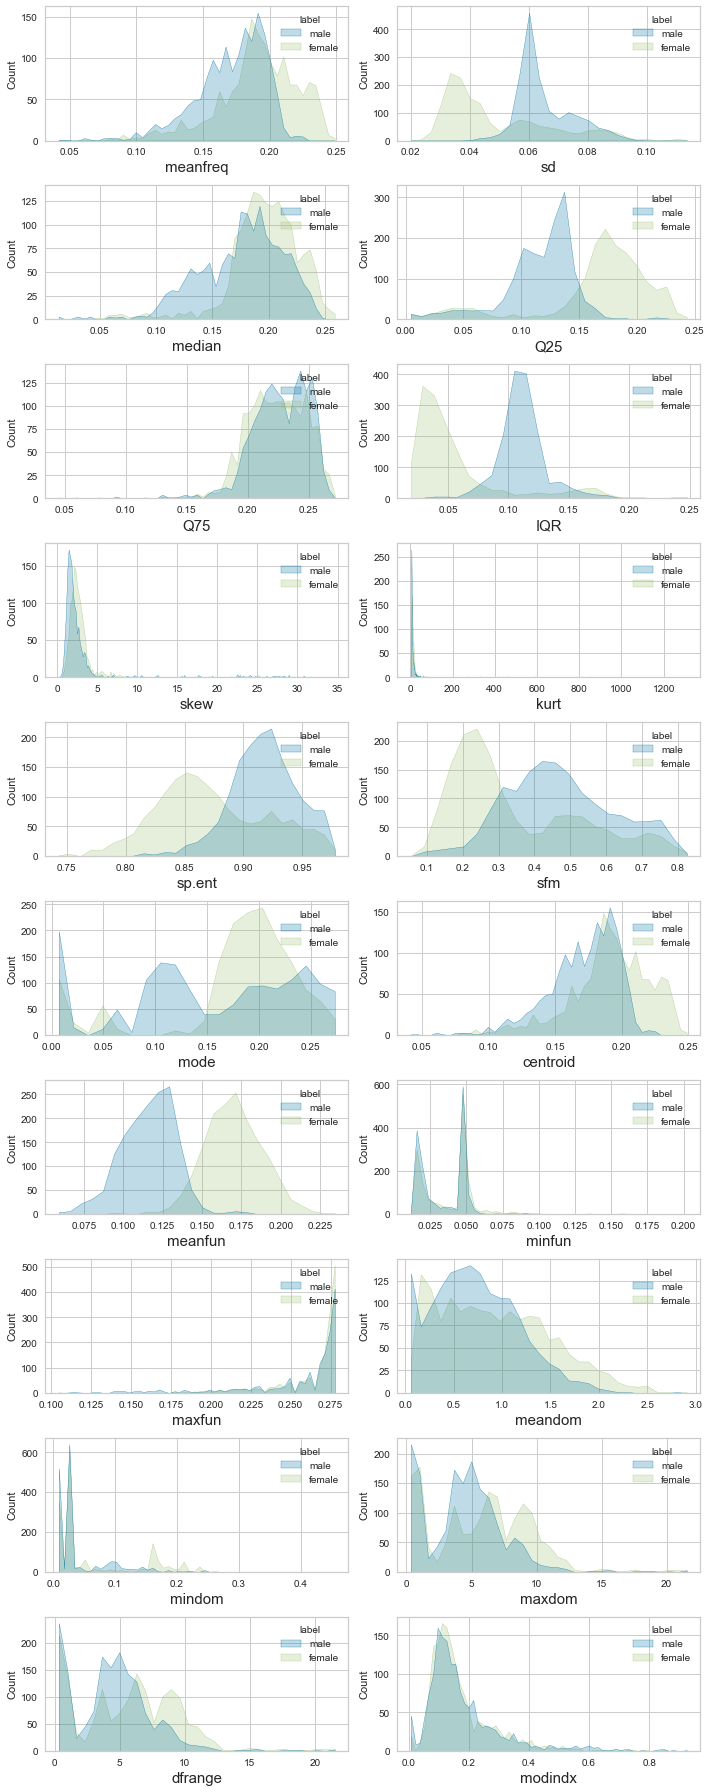

In [204]:
# plotting histogram for each feature with Label.
plt.figure(figsize=(10,25))

for i in range(1,21):
    plt.subplot(10,2,i)
    sns.histplot(x=voice_df.columns[i-1] , data=voice_df, hue='label', element='poly')
    plt.xlabel(voice_df.columns[i-1], fontsize=15)
plt.subplots_adjust(top=0.85)
plt.tight_layout()

- variables such as sd, Q25, IQR, sp.ent, sfm, mode, and meanfun may help us separate male voices from female voices

# Splitting Data into X & y

In [205]:
X = voice_df.drop('label', axis=1)
y = voice_df['label']

## Scaling the independent variables i.e. X

In [206]:
cols = X.columns.tolist()
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X= pd.DataFrame(X, columns=cols)

In [207]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046


## Label Encoding Target Variable

In [208]:
# Mapping values of Label Male as 1 and female as 0
y = y.map({'male':1,'female':0})

In [209]:
y.value_counts()

1    1584
0    1584
Name: label, dtype: int64

## Feature Selection using Random Forest

In [210]:
#-------------------------------------------------------------------------------------------------------------------------------
from random import randint                                          # Importing to generate random integers
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
from sklearn.ensemble import RandomForestClassifier                 # To create a random forest model using algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [211]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 4
Threshold set by Model: 0.05
Features: ['sd', 'Q25', 'IQR', 'meanfun']


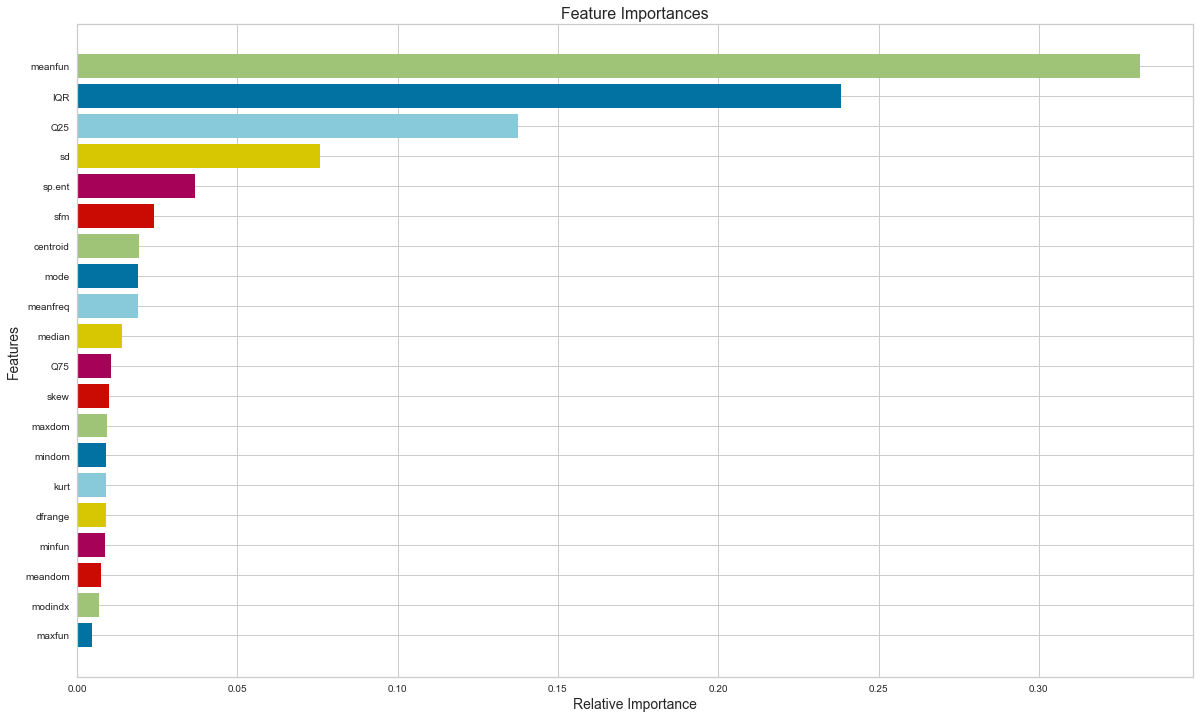

In [212]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

- Here we can see the featuers selected by Random Forest are Meanfun, IQR, Q25 and SD

## PCA

In [213]:
from sklearn.decomposition import PCA

In [214]:
# specifying 95% variance (0.95) to be explained by our PCA model out of a total of 100%.
pca = PCA(20, random_state=0).fit(X)

In [215]:
# Plotting the variance graph to show the amount of variance explained with respect to the number of features.
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3) * 100)

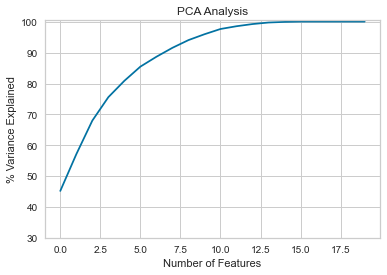

In [216]:
plt.plot(var)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30, 100.5)
plt.style.context('seaborn-whitegrid')

In [254]:
pca = PCA(n_components=9, random_state=0)
pca.fit(X)

X_pca = pca.transform(X)
print(X_pca.shape)

(3168, 9)


In [255]:
X_pca = pd.DataFrame(X_pca)

## New X as per Selected Features & PCA

In [256]:
'''select_feat2 = ['meanfreq',
 'sd',
 'median',
 'Q25',
 'IQR',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',]'''

"select_feat2 = ['meanfreq',\n 'sd',\n 'median',\n 'Q25',\n 'IQR',\n 'sp.ent',\n 'sfm',\n 'mode',\n 'centroid',\n 'meanfun',]"

In [257]:
X_SF = voice_df[selected_feat]

In [258]:
X_SF.head()

,sd,Q25,IQR,meanfun
0,0.064241,0.015071,0.075122,0.084279
1,0.067310,0.019414,0.073252,0.107937
2,0.083829,0.008701,0.123207,0.098706
3,0.072111,0.096582,0.111374,0.088965
4,0.079146,0.078720,0.127325,0.106398


In [259]:
#X_SF2 = voice_df[select_feat2]

In [260]:
#X_SF2.head()

In [261]:
X_pca.head()

,0,1,2,3,4,5,6,7,8
0,8.208516,2.164488,1.959784,5.452417,0.930851,-1.202176,-1.239370,-1.555728,-1.815147
1,8.671892,3.854627,4.107208,5.079575,0.411480,-0.120161,-0.880189,-0.899986,-0.390545
2,9.111169,4.519140,7.528252,3.464543,-0.049165,1.219385,-0.268173,-0.187280,-0.457554
3,4.109261,-0.562341,-1.253138,-0.667666,0.003349,-0.965539,-0.348339,0.193231,-0.575210
4,4.057255,-2.272709,-0.576060,0.962292,-0.183624,-0.493363,0.411477,0.250032,-0.109875


# Define Models

## Train Test Split

**We will run various algorithms on data with all features and selected features.** 

In [262]:
# Splitting the X
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('Train dataset shape: {} {}'.format(X_train.shape, y_train.shape))
print('Test dataset shape: {} {}'.format(X_test.shape, y_test.shape))

Train dataset shape: (2534, 20) (2534,)
Test dataset shape: (634, 20) (634,)


In [263]:
# Splitting the X with selected features
X_SF_train,X_SF_test,y_SF_train,y_SF_test=train_test_split(X_SF,y,test_size=0.2,random_state=0)
print('Train dataset shape: {} {}'.format(X_SF_train.shape, y_SF_train.shape))
print('Test dataset shape: {} {}'.format(X_SF_test.shape, y_SF_test.shape))

Train dataset shape: (2534, 4) (2534,)
Test dataset shape: (634, 4) (634,)


In [264]:
# Splitting the X with 10 selected features
X_SF2_train,X_SF2_test,y_SF2_train,y_SF2_test=train_test_split(X_pca,y,test_size=0.2,random_state=0)
print('Train dataset shape: {} {}'.format(X_SF2_train.shape, y_SF2_train.shape))
print('Test dataset shape: {} {}'.format(X_SF2_test.shape, y_SF2_test.shape))

Train dataset shape: (2534, 9) (2534,)
Test dataset shape: (634, 9) (634,)


## Training Data with Various ALgotithms

In [265]:
Models = []
Acc_list = []
Acc_list_SF = []
Acc_list_SF2 = []

In [266]:
import time
def fit_pred_acc(model,name):
    Models.append(name)
    start_time1 = time.time()
    model.fit(X_train,y_train)
    end_time1 = time.time()
    pred1 = model.predict(X_test)
    print('Accuracy with All features:',accuracy_score(y_test,pred1))
    print('Time to fit: ',end_time1-start_time1)
    Acc_list.append(accuracy_score(y_test,pred1))
    
    start_time2 = time.time()
    model.fit(X_SF_train,y_SF_train)
    end_time2 = time.time()
    pred2 = model.predict(X_SF_test)
    print('Accuracy with RF Selected Features:',accuracy_score(y_SF_test,pred2))
    print('Time to fit: ',end_time2-start_time2)
    Acc_list_SF.append(accuracy_score(y_SF_test,pred2))
    
    start_time3 = time.time()
    model.fit(X_SF2_train,y_SF2_train)
    end_time3 = time.time()
    pred3 = model.predict(X_SF2_test)
    print('Accuracy with PCA Selected Features:',accuracy_score(y_SF2_test,pred3))
    print('Time to fit: ',end_time3-start_time3)
    Acc_list_SF2.append(accuracy_score(y_SF2_test,pred3))

### Logistic Regression

In [267]:
Model_Log_reg = LogisticRegression()
fit_pred_acc(Model_Log_reg,'Logistic Regression')

Accuracy with All features: 0.973186119873817
Time to fit:  0.04741024971008301
Accuracy with RF Selected Features: 0.9227129337539433
Time to fit:  0.019962787628173828
Accuracy with PCA Selected Features: 0.9684542586750788
Time to fit:  0.031940460205078125


### Decision Tree With GridSearchCV

In [268]:
DT = DecisionTreeClassifier(random_state = 0)
tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,50),'max_features': ['sqrt', 'log2', None] }]
Model_DT = GridSearchCV(DT,tree_para, cv=5, refit='AUC')

In [269]:
fit_pred_acc(Model_DT,'Decision Tree')

Accuracy with All features: 0.9621451104100947
Time to fit:  39.38037872314453
Accuracy with RF Selected Features: 0.9574132492113565
Time to fit:  19.513269662857056
Accuracy with PCA Selected Features: 0.9511041009463722
Time to fit:  30.508347988128662


### Random Forest Classifier with RandomSearchCV

In [270]:
from scipy.stats import randint as sp_randint
RF_Classifier = RandomForestClassifier(random_state = 0)
param_dist = {"max_depth": range(2,12),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
Model_RF = RandomizedSearchCV(RF_Classifier, param_distributions = param_dist,
                                   n_iter = 50,
                                   n_jobs = -1)

In [271]:
fit_pred_acc(Model_RF,'Random Forest')

Accuracy with All features: 0.9779179810725552
Time to fit:  610.8518805503845
Accuracy with RF Selected Features: 0.9747634069400631
Time to fit:  227.5724778175354
Accuracy with PCA Selected Features: 0.9637223974763407
Time to fit:  1456.843449831009


### Naive Bayes 

In [272]:
Model_NB = GaussianNB()
fit_pred_acc(Model_NB,'Naive Bayes')

Accuracy with All features: 0.8848580441640379
Time to fit:  0.00998234748840332
Accuracy with RF Selected Features: 0.9574132492113565
Time to fit:  0.0069866180419921875
Accuracy with PCA Selected Features: 0.9305993690851735
Time to fit:  0.004492521286010742


### K-Nearest Neighbours using RandomSearchCV

In [273]:
from sklearn.neighbors import KNeighborsClassifier

param_dist = {"n_neighbors": range(1, 30), "algorithm": ["auto", "ball_tree"],
              "leaf_size":  2 ** np.arange(10),
              "metric": ["euclidean", "manhattan", "minkowski", "chebyshev"]
              }
n_iter_search = 25
knn_model = KNeighborsClassifier()

Model_KNN1= RandomizedSearchCV(knn_model, random_state=0, param_distributions=param_dist,
                   n_iter=n_iter_search,
                   n_jobs=-1)

fit_pred_acc(Model_KNN1, 'KNN with RandomSearchCV')

Accuracy with All features: 0.9842271293375394
Time to fit:  6.109152793884277
Accuracy with RF Selected Features: 0.9763406940063092
Time to fit:  3.436615467071533
Accuracy with PCA Selected Features: 0.9747634069400631
Time to fit:  3.59033203125


**To pick a good K Value create a for loop that trains various KNN models with different k values.**

In [274]:
knn_acc_list1 = []
knn_acc_list2 = []
knn_acc_list3 = []
for i in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    pred_1 = knn_model.predict(X_test)
    
    knn_model.fit(X_SF_train, y_SF_train)
    pred_2 = knn_model.predict(X_SF_test)
    
    knn_model.fit(X_SF2_train, y_SF2_train)
    pred_3 = knn_model.predict(X_SF2_test)
    
    knn_acc_list1.append(accuracy_score(y_test, pred_1))
    knn_acc_list2.append(accuracy_score(y_SF_test, pred_2))
    knn_acc_list3.append(accuracy_score(y_SF2_test, pred_3))
    
print("Maximum accuracy and the corresponding value of k for all features is", max([(v,i+1) for i,v in enumerate(knn_acc_list1)]),'respectively.')
print("Maximum accuracy and the corresponding value of k for 4 Selected features is", max([(v,i+1) for i,v in enumerate(knn_acc_list2)]),'respectively.')
print("Maximum accuracy and the corresponding value of k for 10 Selected features is", max([(v,i+1) for i,v in enumerate(knn_acc_list3)]),'respectively.')

Maximum accuracy and the corresponding value of k for all features is (0.9779179810725552, 6) respectively.
Maximum accuracy and the corresponding value of k for 4 Selected features is (0.9779179810725552, 3) respectively.
Maximum accuracy and the corresponding value of k for 10 Selected features is (0.973186119873817, 4) respectively.


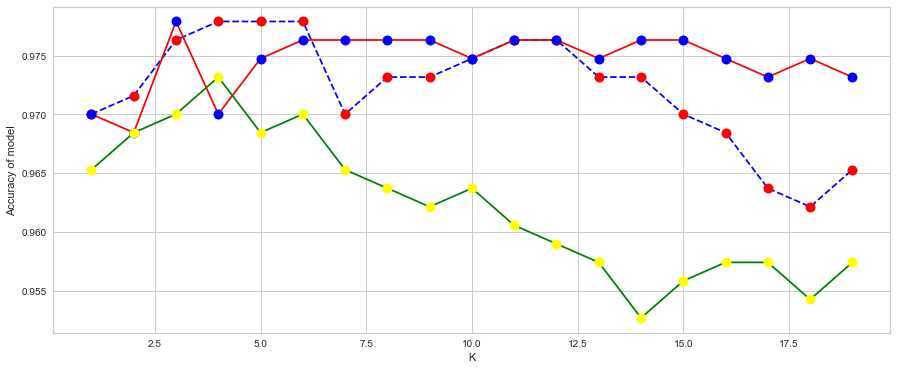

In [275]:
plt.figure(figsize=(15,6))
plt.plot(range(1,20), knn_acc_list1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
plt.plot(range(1,20), knn_acc_list2, color='red', marker='o', markerfacecolor='blue', markersize='10')
plt.plot(range(1,20), knn_acc_list3, color='green', marker='o', markerfacecolor='yellow', markersize='10')

plt.xlabel('K')
plt.ylabel('Accuracy of model')
plt.show()


**From the Plot We can See Best K Values for All features as 4/5/6 & for Selected Features as 3**


**Let's use above best K's for KNN Algo**

In [276]:
Models.append('KNN with Best K values')

Model_KNN2 = KNeighborsClassifier(n_neighbors = 5)
start_t_knn1=time.time()
Model_KNN2.fit(X_train,y_train)
end_t_knn1=time.time()
pred_knn1 = Model_KNN2.predict(X_test)
Acc_list.append(accuracy_score(y_test,pred_knn1))
print('Accuracy- All Features: ',accuracy_score(y_test,pred_knn1))
print('Time to fit: ',end_t_knn1-start_t_knn1)

Model_KNN2 = KNeighborsClassifier(n_neighbors = 3)
start_t_knn2=time.time()
Model_KNN2.fit(X_SF_train,y_SF_train)
end_t_knn2=time.time()
pred_knn2 = Model_KNN2.predict(X_SF_test)
Acc_list_SF.append(accuracy_score(y_SF_test,pred_knn2))
print('Accuracy- RF Features: ',accuracy_score(y_SF_test,pred_knn2))
print('Time to fit: ',end_t_knn2-start_t_knn2)

Model_KNN2 = KNeighborsClassifier(n_neighbors = 3)
start_t_knn3=time.time()
Model_KNN2.fit(X_SF2_train,y_SF2_train)
end_t_knn3=time.time()
pred_knn3 = Model_KNN2.predict(X_SF2_test)
Acc_list_SF2.append(accuracy_score(y_SF2_test,pred_knn3))
print('Accuracy- PCA Features: ',accuracy_score(y_SF2_test,pred_knn3))
print('Time to fit: ',end_t_knn3-start_t_knn3)


Accuracy- All Features:  0.9779179810725552
Time to fit:  0.03693199157714844
Accuracy- RF Features:  0.9779179810725552
Time to fit:  0.007001399993896484
Accuracy- PCA Features:  0.9700315457413249
Time to fit:  0.026950359344482422


### Support Vector Machine

In [277]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

**Linear SVM**

In [278]:
Model_SVM_linear = LinearSVC()
fit_pred_acc(Model_SVM_linear,'Linear SVM')

Accuracy with All features: 0.9700315457413249
Time to fit:  0.13724493980407715
Accuracy with RF Selected Features: 0.9558359621451105
Time to fit:  0.008983135223388672
Accuracy with PCA Selected Features: 0.9684542586750788
Time to fit:  0.058889150619506836


In [279]:
Model_SVM_Poly = SVC(kernel = 'poly', probability = True)
fit_pred_acc(Model_SVM_Poly,'Poly SVM')

Accuracy with All features: 0.9589905362776026
Time to fit:  0.6073691844940186
Accuracy with RF Selected Features: 0.9794952681388013
Time to fit:  0.20062565803527832
Accuracy with PCA Selected Features: 0.9589905362776026
Time to fit:  0.42021870613098145


In [280]:
Model_SVM_RBF = SVC()
fit_pred_acc(Model_SVM_RBF, 'RBF SVM')

Accuracy with All features: 0.9842271293375394
Time to fit:  0.08583903312683105
Accuracy with RF Selected Features: 0.9763406940063092
Time to fit:  0.08335661888122559
Accuracy with PCA Selected Features: 0.9794952681388013
Time to fit:  0.13275671005249023


In [281]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
Model_SVM_GridCV = GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
fit_pred_acc(Model_SVM_GridCV,'SVM with GridCV')

Accuracy with All features: 0.9842271293375394
Time to fit:  249.41130471229553
Accuracy with RF Selected Features: 0.9842271293375394
Time to fit:  83.85836124420166
Accuracy with PCA Selected Features: 0.9794952681388013
Time to fit:  199.38724279403687


In [282]:
Model_SVM_GridCV.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

# Model Evalution

In [283]:
Model_evalution = {'Algo Name':Models,'Accuracy All Features':Acc_list,
                   'Accuracy RF Selected Features':Acc_list_SF, 
                  'Accuracy PCA Selected Features':Acc_list_SF2}
df_ME = pd.DataFrame(Model_evalution)

In [284]:
df_ME

,Algo Name,Accuracy All Features,Accuracy RF Selected Features,Accuracy PCA Selected Features
0,Logistic Regression,0.973186,0.922713,0.968454
1,Decision Tree,0.962145,0.957413,0.951104
2,Random Forest,0.977918,0.974763,0.963722
3,Naive Bayes,0.884858,0.957413,0.930599
4,KNN with RandomSearchCV,0.984227,0.976341,0.974763
5,KNN with Best K values,0.977918,0.977918,0.970032
6,Linear SVM,0.970032,0.955836,0.968454
7,Poly SVM,0.958991,0.979495,0.958991
8,RBF SVM,0.984227,0.976341,0.979495
9,SVM with GridCV,0.984227,0.984227,0.979495


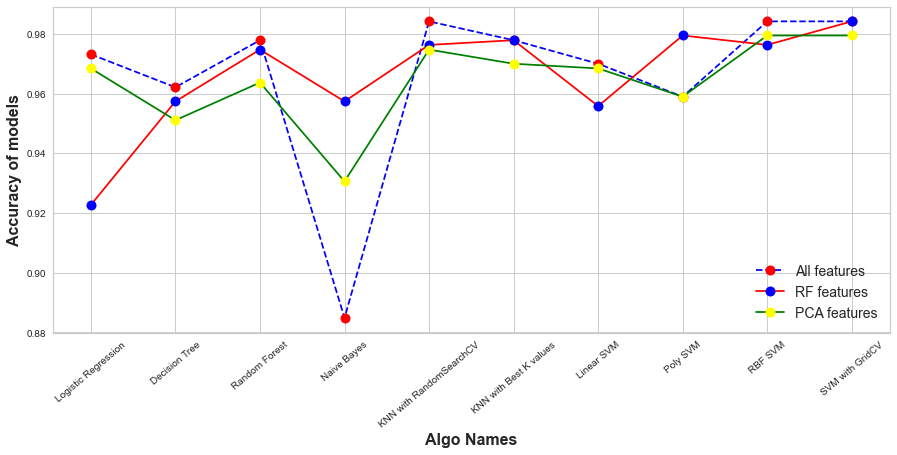

In [304]:
plt.figure(figsize=(15,6))
plt.plot(df_ME['Accuracy All Features'], color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10',label='All features')
plt.plot(df_ME['Accuracy RF Selected Features'], color='red', marker='o', markerfacecolor='blue', markersize='10',label='RF features')
plt.plot(df_ME['Accuracy PCA Selected Features'], color='green', marker='o', markerfacecolor='yellow', markersize='10',label='PCA features')
plt.legend(loc=4, fontsize=14)
plt.xlabel('Algo Names', fontsize=16, weight='bold')
plt.xticks(ticks= range(0,10) , labels = df_ME['Algo Name'].tolist(), rotation=40);
plt.ylabel('Accuracy of models', fontsize=16, weight='bold')
plt.show()

- The Model Selected is SVM using {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} and accuracy of almost 98%


- The Target data is well Balanced hence we evaluate only using accuracy score.

# Conclusion

- We  have attempted to classify gender using six trained models among them the **Support Vector Machine RBF with GridSearchCV** model performs better than the others.
- The Model which we proposed has **best accuracy of almost 98%** with less time taken with Dimensionality reduction using PCA.
- Models with All 20 features give just above 98% accuracy for SVM but take a lot more time compared to PCA.
- Modela with RF selected features give just above 98% accuracy for SVM but the number of features considered are too low and can degrade the performance in future.
- Models with good performance will help to use and develop voice based gender recognition systems more effectively in wide range of aspects.